# Berlin government spending data analysis and policy area prediction

#BANKSapi GmbH 

Author: Gaurav Sharma(gaurav.sharma0491juit@gmail.com)

**Import packages:**
The main packages for doing data analysis, visualizytion and machine learning(prediction) are numpy, pandas, scikit learn, keras, nltk, ibmlearn, pickle, matplotlib and seaborn

**classification**

Individual expenditures must be allocated based on purpose field, in the appropriate policy area.

** Algorithms Evaluated**: SVM, Random Forest, LSTM

**Evaluation Results (Accuracy)**: 30% test data

**LSTM:** 0.7294230461882691

**Random Forest:** 0.6208246763624741

**Support Vector Machine:** 0.7012945501038836


In [2]:
# Import all necessary packages for data analysis, data preprocessing and supervised machine learning models
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import nltk
import seaborn as sn
import keras


from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from nltk.corpus import stopwords

from mlxtend.plotting import plot_confusion_matrix

from bs4 import BeautifulSoup


from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential

warnings.filterwarnings('ignore')
nltk.download('stopwords')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Class defination for majority data preprocessing
class data_preprocess(object):
    
    # Class constructor to initialize all necessary resources for data preperation and preprocessing
    # Input: data(i.e., input data file)
    def __init__(self):
      
        # Get set of German and English stop words
        self.de_stopwords = set(stopwords.words('german'))
        self.en_stopwords = set(stopwords.words('english'))
        
        # Initialize Label Encoder from sklearn.preprocessing package
        self.lb_encode = LabelEncoder()
        
        # Initialize CountVectorizer and TfidfTransformer from sklearn.feature_extraction.text package
        self.count_vec = CountVectorizer() 
        self.tfidf = TfidfTransformer()
    
    # Function to preprocess data frame object
    # Input: data(i.e., input data file)
    def train_data(self, data):
      
        # Select essential data frame columns required for analysis
        data = data[['Politikbereich','Zweck','Betrag']]
        
        # Remove missing or nan values from data frame
        data['Zweck'].replace('', np.nan, inplace=True)
        data['Politikbereich'].replace('', np.nan, inplace=True)
        
        # Drop rows with blank values
        data.dropna(subset=['Zweck'], inplace=True)
        data.dropna(subset=['Politikbereich'], inplace=True)
        return data
    
    
    # Function to clean textual data
    def clean_text(self, text):
        # Process textual data and remove special characters and stopwords
        text = BeautifulSoup(text, "lxml").text
        text = text.lower()
        text = re.sub('<br />', '', text)
        text = re.sub('(\n|\r|\t)+', ' ', text)
        text = re.sub('ß', 'ss', text)
        text = re.sub('’', "'", text)
        text = re.sub('[^a-zA-Z0-9? äöü]+', '', text)
        text = re.sub("\d+", " ", text)
        text = re.sub(' +', ' ', text)
        text = text.split()
        # Remove stop words, German and English
        text = [w for w in text if w not in self.de_stopwords]
        text = [w for w in text if w not in self.en_stopwords]
        text = [w for w in text if len(w)>1]
        text = ' '.join(text)
        # Return processed textual data
        return text
    
    # Function to transform catagorical data
    # Input: Categorical labels
    def label_encoder(self, labels):
        trans_labels = self.lb_encode.fit_transform(labels)
        return trans_labels
    
    
    # Function to inverse transforme categorical data
    # Input: Categorical predictions
    def inverse_transform_label(self,y_pred):
        y_pred = self.lb_encode.inverse_transform(y_pred)
        return y_pred
    
    # Function to access encoded labels(i.e., target class values)
    def return_class_name(self):
        labels = self.lb_encode.classes_
        return labels
      
    # Function to fit Countervector and Tfidf on the training dataset
    # Input: train data
    def ConterVec_fit_tfidf(self, data):
        vect_data = self.count_vec.fit_transform(data)
        fit_tfidf = self.tfidf.fit_transform(vect_data)
        return fit_tfidf
    
    # Function to process test data instances using transform method to create feature representation of test data
    # Input: train data
    def ConterVec_tfidf_transform(self, data):
        vect_data = self.count_vec.transform(data)
        transform_tfidf = self.tfidf.transform(vect_data)
        return transform_tfidf


In [0]:
# Class defination for Random Forest algorithm 
class random_forest_class(object):
  
    # Class constructor
    def __init__(self):
        []

    # Function for creating classifier object 
    def random_model(self):
        # Random forest train control parameters
        random_forest_classifier = RandomForestClassifier(n_estimators=60, 
                                                          max_depth=49,
                                                          random_state=50,
                                                          criterion='entropy')
        return random_forest_classifier

In [0]:
# Class defination for Support Vector Machine algorithm
class svn_class(object):
  
    # Class constructor
    def __init__(self):
        []
    
    # Function for creating classifier object
    def svd_model(self):
        # SVM train control parameters
        svm_ =SGDClassifier(loss='hinge', 
                           penalty='l2',
                           alpha=1e-3, 
                           random_state=42, 
                           max_iter=5, 
                           tol=None)
        return sgd

In [0]:
# Class defination for Long Short Term Memory networks algorithm
class LSTM_class(object):
  
    # Class constructor to initialize all necessary resources for LSTM training
    # Input: emb_dm(i.e., embedding dimensions)
    # Input: n_most_common_words(i.e., number of most common words selected)
    # Input: max_len(i.e., maximum length of train data)
    def __init__(self,emb_dim,n_most_common_words,max_len):
        self.emb_dim = emb_dim
        self.n_most_common_words = n_most_common_words
        self.max_len = max_len
    
    # Function to rocess catagorical labels(i.e., Target class) for training
    # Input: text_data(i.e., training data)
    def label(self, text_data):
        target_labels = pd.get_dummies(text_data['Politikbereich']).values
        return target_labels
    
    # Function to reprocess training data, generating 3D training data for LSTM model training 
    def feature(self, data):
      
        # tokenize input training data
        tokenizer = Tokenizer(num_words=self.n_most_common_words, 
                              filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                              lower=True)
        tokenizer.fit_on_texts(data['Zweck'].values)
        
        # convert generated tokens into sequences
        sequences = tokenizer.texts_to_sequences(data['Zweck'].values)
        word_index = tokenizer.word_index
        print('Found %s unique tokens.' % len(word_index))
        
        # trim the sequence using max_len parameter
        output_sequence = pad_sequences(sequences, maxlen=max_len)
        
        # return output sequence
        return output_sequence
        
    # Function to defing depp learning models structure and initialize model object
    def build_classifier(self, train_data):
      
        # Create sequential model
        classifier = Sequential()
        
        # Define embedding layer using input parameters n_most_common_words, emb_dim and train_data.shape
        classifier.add(Embedding(self.n_most_common_words, 
                                 self.emb_dim, 
                                 input_length=train_data.shape[1]))
        classifier.add(SpatialDropout1D(0.7))
        
        # define long short memory characteristics with dropout
        classifier.add(LSTM(64, dropout=0.2, 
                            recurrent_dropout=0.2))
        
        # Add Dense layer with softmax activation function 
        classifier.add(Dense(28, 
                             activation='softmax'))
        
        # Compile classifier object and return it 
        classifier.compile(optimizer = 'adam', 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])
        
        return classifier

<Figure size 2880x2880 with 0 Axes>

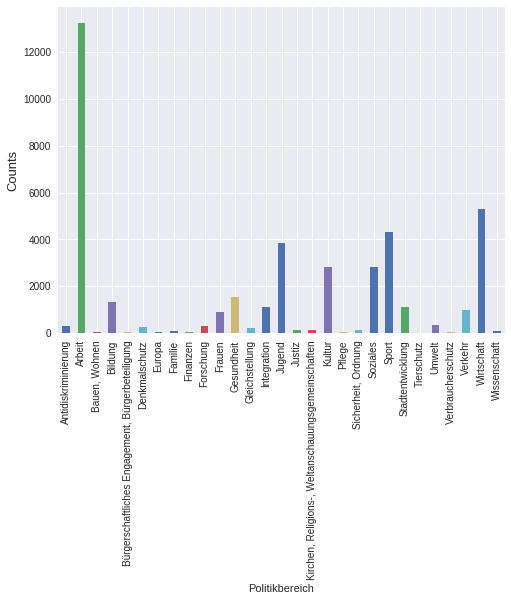

(259840, 20874) (12514, 20874) (259840,) (12514,)
############################ SVM result###############
accuracy 0.7012945501038836
              precision    recall  f1-score   support

           0       0.37      0.84      0.51        94
           1       0.98      0.72      0.83      3977
           2       0.12      0.40      0.19        20
           3       0.66      0.66      0.66       398
           4       0.04      0.91      0.08        11
           5       0.39      0.86      0.54        74
           6       0.07      0.76      0.13        17
           7       0.12      0.70      0.21        23
           8       0.40      0.94      0.57        18
           9       0.38      0.90      0.54        94
          10       0.69      0.57      0.62       277
          11       0.77      0.73      0.75       467
          12       0.15      0.51      0.23        71
          13       0.53      0.60      0.56       329
          14       0.91      0.66      0.77      1154
  

In [9]:
# Class defination of data analysis object, wrapper class for all above classes
class analysis_class(object):
  
    # Class constructor to initialize all necessary resources for data analysis
    # Input: data(i.e., Training data)
    # Input: emb_dm(i.e., embedding dimensions)
    # Input: n_most_common_words(i.e., number of most common words selected)
    # Input: max_len(i.e., maximum length of train data)
    def __init__(self, data, emb_dim, n_most_common_words, max_len):
        self.data = data
        self.data_preprocess = data_preprocess(data)
        # Initialize machine learning model object
        self.svn_object = svn_class()
        self.random_forest_object = random_forest_class()
        self.lstm_object = LSTM_class(emb_dim, n_most_common_words, max_len)
        
    # Wrapper functions:
    # Function to remove unecessary column and generate training corpus
    # Input: data(i.e., Training data)
    def call_remove_missing_column(self,data):
        corpus = self.data_preprocess.train_data(data)
        return corpus
    
    # Function to call data_preprocess.clean_text method
    # Input: text(i.e., Training textual data)
    def call_clean_text(self, text):
        cleaned_text = self.data_preprocess.clean_text(text)
        # return cleaned data
        return cleaned_text
    
    # Function to call data_preprocess.label_encoder function
    # Input: labels(i.e., categorical target class attribute)
    def call_label_encoder(self,label):
        labels = self.data_preprocess.label_encoder(label)
        return labels
      
    # Function to call data_preprocess.return_class_name function
    def call_return_class_name(self):
        labels = self.data_preprocess.return_class_name()
        return labels
    
    # Function to convert labels into LSTM compatible by calling lstm_object.label function
    def call_label(self,label):
        labels = self.lstm_object.label(label)
        return labels
    # Function to call data_preprocess.ConterVec_fit_tfidf function    
    def call_ConterVec_fit_tfidf(self,feature):
        feature_set = self.data_preprocess.ConterVec_fit_tfidf(feature)
        return feature_set
     
    # Function to call data_preprocess.ConterVec_fit_tfidf function
    def call_ConterVec_tfidf_transform(self,feature):
        transform_feature = self.data_preprocess.ConterVec_tfidf_transform(feature)
        return transform_feature
    
    # Function to call lstm_object.feature function and generate LSTM training features
    def lstm_feature(self, arg_text):
        feature_set = self.lstm_object.feature(arg_text)
        return feature_set
    
    # Function to call lstm_object.build_classifier function and initialize LSTM classifier object
    def call_lsmt_build_classifier(self, X):
        classifier = self.lstm_object.build_classifier(X)
        return classifier
    
    # Function to call svn_object.svd_model function and initialize svm classifier object
    def call_svm(self):
        svm = self.svn_object.svd_model()
        return svm
    
    # Function to call random_forest_object.random_model function and initialize random forest classifier object
    def call_random_forest(self):
        random_forest = self.random_forest_object.random_model()
        return random_forest
        
        
        
if __name__ == '__main__':
     
    # Load training data from csv file into pandas data frame
    with open('tempData.csv', encoding = 'unicode_escape') as f:
        data = pd.read_csv(f)
    
    # Define application parameters
    # Number of epochs for LSTM model training
    epochs = 50
    emb_dim = 128
    batch_size = 256
    n_most_common_words = 24914
    max_len = 130
    # train-test split ratio
    arg_split_ratio = 0.3
    # Enable or disable smote algorithm(i.e., data sampling algorithm) 
    enamble_smote=True
    
    # Create analysis_class object
    analysis_object = analysis_class(data, emb_dim, n_most_common_words, max_len)
    
    # Data divided into a training set and prediction set
    text_data = analysis_object.call_remove_missing_column(data)
    text_data['Zweck'] = text_data['Zweck'].apply(analysis_object.call_clean_text)
    text_data['Zweck'].replace('', np.nan, inplace=True)
    text_data.dropna(subset=['Zweck'], inplace=True)

    # Plot class distribution in training set
    plt.figure(3,figsize =(40,40))
    fig = plt.figure(figsize=(8,6))
    plt.ylabel('Counts', fontsize=13)
    text_data.groupby('Politikbereich').Betrag.count().plot.bar(ylim=0)
    plt.show()

    # Process Politikbereich attribute and remove occurences(i.e., less than 6 instances)  
    bytag = text_data.groupby('Politikbereich').aggregate(np.count_nonzero)
    tags = bytag[bytag.Zweck >= 6].index
    text_data = text_data[text_data['Politikbereich'].isin(tags)]
    
    
    # Convert Politikbereich attribute into target attribute
    labels = list(text_data['Politikbereich'])
    y = analysis_object.call_label_encoder(labels)
        
    # Split train and test data using user defined split ratio

    X_train, X_test, y_train, y_test = train_test_split(text_data['Zweck'], y, 
                                                    test_size = arg_split_ratio, 
                                                    random_state = 10,
                                                    stratify=y)
    
    # Convert textual data into tf-idf values for test and train data
    X_train = analysis_object.call_ConterVec_fit_tfidf(X_train)
    X_test = analysis_object.call_ConterVec_tfidf_transform(X_test)
    
    '''Data sampling algorithm is applied only on train data to balance the 
    classes and to avoid the information leakage problem'''
    if enamble_smote:
      # Applying smote algorithm to oversample minority classes in train data
      smt = SMOTE()
      [X_train, y_train] = smt.fit_resample(X_train,y_train)
      print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    
    print('############### SVM result ###############')
    
    # Model building initialization
    sgd_model = analysis_object.call_svm()
    
    # Train classification model using X_train and y_train
    sgd_model.fit(X_train, y_train)
    
    # Generate predictions on test dataset(i.e., X_test)
    svm_y_pred = sgd_model.predict(X_test)
    
    # Evaluate and print results
    print('accuracy %s' % accuracy_score(y_test, svm_y_pred))
    print(classification_report(y_test, svm_y_pred))
    print(confusion_matrix(y_test, svm_y_pred))
    
    
    print('############### Random Forest result ###############')
    
    # Model building initialization
    random_forest_model = analysis_object.call_random_forest()
    
    # Train classification model using X_train and y_train
    random_forest_model.fit(X_train, y_train)
    
    # Generate predictions on test dataset(i.e., X_test)
    random_y_pred = random_forest_model.predict(X_test)
    
    # Evaluate and print results
    print('accuracy %s' % accuracy_score(y_test,random_y_pred))
    print(classification_report(y_test, random_y_pred))
    print(confusion_matrix(y_test, random_y_pred))
    
    print('############## LSTM results ##############')
    # Process training data for LSTM model training
    # Data preprocessing steps are different for conventional models like Random forest
    # LSTM requires input training data in sequential order to capture sentence level information
    target_labels = analysis_object.call_label(text_data)
    print('Shape of label tensor:', target_labels.shape)
    
    # Model building initialization, generate sequential textual features
    data = analysis_object.lstm_feature(text_data)
    
    ''' Split train and test data in the ratio of 90:10 '''
    train_X, test_X, train_y, test_y = train_test_split(data, target_labels, 
                                                    test_size = arg_split_ratio, 
                                                    random_state = 10,
                                                    stratify=target_labels)
    
    # Apply smote algorithm on train data if enamble_smote=True
    if enamble_smote:
      # Applying smote algorithm to oversample minority classes in train data
      smt = SMOTE() 
      [train_X, train_y] = smt.fit_resample(train_X,train_y)
    
    # Model building initialization, generate LSTM model
    classifier = analysis_object.call_lsmt_build_classifier(train_X)
    
    # Train classification model using X_train and y_train
    classifier.fit(train_X, train_y, batch_size = arg_batch_size, epochs = arg_epochs)
    
    # Generate predictions on test dataset(i.e., X_test)
    y_pred = classifier.predict(test_X)
    
    # Save trained model for testing script
    classifier.save('model.h5')
    
    # Evaluate and print results
    print(accuracy_score(np.argmax(test_y,axis=1),
                           np.argmax(y_pred,axis=1)))
    print(classification_report(np.argmax(test_y,axis=1),
                           np.argmax(y_pred,axis=1)))
    print(confusion_matrix(np.argmax(test_y,axis=1),
                            np.argmax(y_pred,axis=1)))
